# Computational Social Science Project #3 

**Enter your Name:** Kirtika Kandel

*Semester:* Fall 2024

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

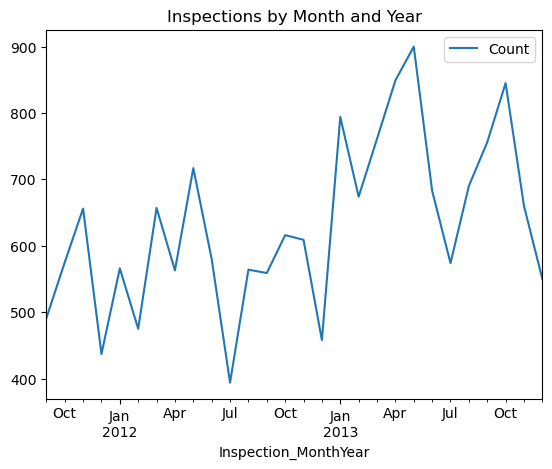

In [7]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

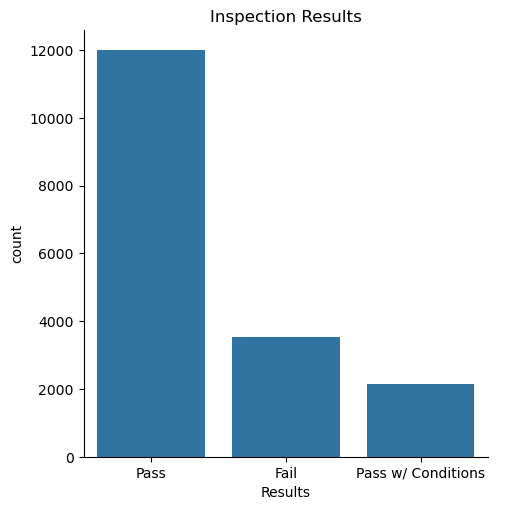

In [8]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

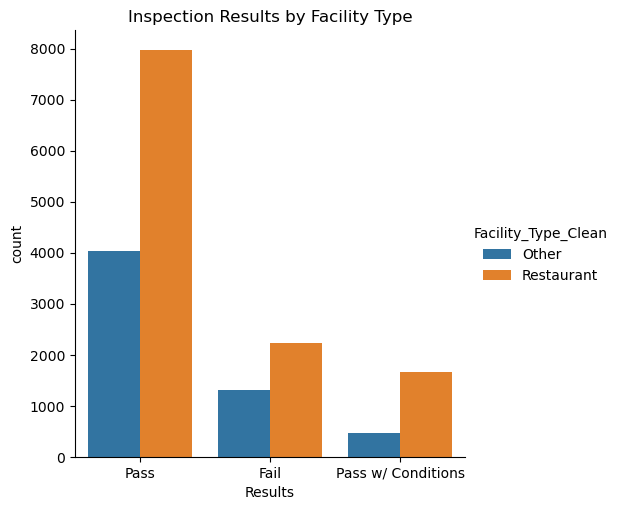

In [9]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [10]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [11]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
# y = y.replace({'Pass w/ Conditions': 'Pass'})
# lb_style = LabelBinarizer()
# y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
# y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [12]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1

Logistic Regression predicts the probability that an input belongs to a specific class by modeling a linear relationship between the input features and the log-odds of the target outcome. It operates under the assumption of a linear relationship between the features and the log-odds of the target variable.

The advantages of Logistic Regression include its simplicity, interpretability, and effectiveness when the classes are linearly separable. However, it is less effective when the relationship between features and the target variable is non-linear.

This model is well-suited to this type of problem due to its straightforward nature and interpretability, making it useful for uncovering baseline patterns in the data.

In [13]:
# Imports
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define target and features
y = chicago_inspections_2011_to_2013['Results']
X = chicago_inspections_2011_to_2013.drop(columns=['Results', 'Facility_Type', 'LICENSE_DESCRIPTION', 'WARD_PRECINCT'])

# Convert categorical features to dummy variables
X = pd.get_dummies(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up a hyperparameter grid
param_grid_lr = {
    'C': [0.1, 1, 10],             
    'multi_class': ['multinomial'], 
    'solver': ['lbfgs', 'saga']     
}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')

# Fit the model
grid_search_lr.fit(X_train, y_train)

# Best model and parameters
best_lr = grid_search_lr.best_estimator_
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)

# Make predictions on the validation set
y_pred_lr = best_lr.predict(X_val)

# Evaluate Logistic Regression on validation set
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_lr))
print("Logistic Regression Precision:", precision_score(y_val, y_pred_lr, average='weighted'))
print("Logistic Regression Recall:", recall_score(y_val, y_pred_lr, average='weighted'))
print("Logistic Regression F1 Score:", f1_score(y_val, y_pred_lr, average='weighted'))

Best Parameters for Logistic Regression: {'C': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Logistic Regression Accuracy: 0.9222984002611818
Logistic Regression Precision: 0.9240399493092324
Logistic Regression Recall: 0.9222984002611818
Logistic Regression F1 Score: 0.9176881316567482


###  Model 2

Random Forest is an ensemble learning technique that constructs multiple decision trees on different subsets of the dataset and combines their predictions by averaging. The underlying principle is that training each tree on a random subset helps reduce overfitting by aggregating diverse decision paths.

The strengths of Random Forest include its ability to handle non-linear relationships effectively and its inherent feature selection process. However, it comes with drawbacks such as higher computational requirements and reduced interpretability.

Given the complexity of the non-linear relationships in this problem, Random Forest proves to be a valuable tool.

In [14]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define target and features
y = chicago_inspections_2011_to_2013['Results']  # Multiclass target variable
X = chicago_inspections_2011_to_2013.drop(columns=['Results', 'Facility_Type', 'LICENSE_DESCRIPTION', 'WARD_PRECINCT'])

# Convert categorical features to dummy variables
X = pd.get_dummies(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up a hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150],        
    'max_depth': [10, 20, None],           
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4]          
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best model and parameters
best_rf = grid_search_rf.best_estimator_
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Make predictions on the validation set
y_pred_rf = best_rf.predict(X_val)

# Evaluate Random Forest on validation set
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Random Forest Precision:", precision_score(y_val, y_pred_rf, average='weighted'))
print("Random Forest Recall:", recall_score(y_val, y_pred_rf, average='weighted'))
print("Random Forest F1 Score:", f1_score(y_val, y_pred_rf, average='weighted'))

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest Accuracy: 0.9294809010773751
Random Forest Precision: 0.9327893007651116
Random Forest Recall: 0.9294809010773751
Random Forest F1 Score: 0.9253645991422011


### Model 3

AdaBoost is an ensemble learning method that sequentially combines multiple simple models, adjusting its focus at each step to emphasize more challenging cases by increasing the weights of misclassified samples.

The advantages of AdaBoost include its ability to reduce bias and variance and effectively handle complex data. However, it has limitations, such as sensitivity to noise and a tendency to overfit if too many models are included.

In this context, AdaBoost is particularly effective at identifying difficult cases, making it a valuable tool for prioritizing high-risk establishments.

In [16]:
# Import 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define target and features
y = chicago_inspections_2011_to_2013['Results']  # Multiclass target variable
X = chicago_inspections_2011_to_2013.drop(columns=['Results', 'Facility_Type', 'LICENSE_DESCRIPTION', 'WARD_PRECINCT'])

# Convert categorical features to dummy variables
X = pd.get_dummies(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up a hyperparameter grid for AdaBoost
param_grid_ab = {
    'n_estimators': [50, 100, 150],         
    'learning_rate': [0.01, 0.1, 1]         
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search_ab = GridSearchCV(AdaBoostClassifier(algorithm='SAMME', random_state=42), param_grid_ab, cv=5, scoring='accuracy') #Added the SAMME algorithm because I kept gettting warnings suggesting to do so

# Fit the model on the training data
grid_search_ab.fit(X_train, y_train)

# Best model and parameters
best_ab = grid_search_ab.best_estimator_
print("Best Parameters for AdaBoost:", grid_search_ab.best_params_)

# Make predictions on the validation set
y_pred_ab = best_ab.predict(X_val)

# Evaluate AdaBoost on validation set
print("AdaBoost Accuracy:", accuracy_score(y_val, y_pred_ab))
print("AdaBoost Precision:", precision_score(y_val, y_pred_ab, average='weighted'))
print("AdaBoost Recall:", recall_score(y_val, y_pred_ab, average='weighted'))
print("AdaBoost F1 Score:", f1_score(y_val, y_pred_ab, average='weighted'))


Best Parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 150}
AdaBoost Accuracy: 0.8876918054195233
AdaBoost Precision: 0.8918999783621873
AdaBoost Recall: 0.8876918054195233
AdaBoost F1 Score: 0.8877957851434273


### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

Among the three metrics, Recall emerges as a key priority in this context.

While Accuracy provides an overall assessment of the model's performance, it may not be the most insightful metric in scenarios involving imbalanced data or outcomes with high stakes, such as missed audits. Precision, by contrast, measures the proportion of flagged businesses that are genuinely high-risk, improving audit efficiency by reducing unnecessary investigations.

Recall, however, is crucial as it emphasizes identifying as many high-risk establishments as possible. A high Recall ensures that most risky cases are detected, even if it leads to more false positives. This is especially vital in predictive auditing, where overlooking a high-risk establishment could result in serious public health consequences.

Considering these factors, prioritizing Recall is critical for effectively managing risks and protecting public health.

In [20]:

# Import
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import numpy as np

# Load and prepare data
y = chicago_inspections_2011_to_2013['Results']  # Multiclass target variable
X = chicago_inspections_2011_to_2013.drop(columns=['Results', 'Facility_Type', 'LICENSE_DESCRIPTION', 'WARD_PRECINCT'])
X = pd.get_dummies(X)  # Convert categorical features to dummy variables

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the models
models = {
    "Logistic Regression": LogisticRegression(C=1, multi_class='multinomial', solver='lbfgs', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=1, algorithm='SAMME', random_state=42)
}

# Define the scoring metrics #Added zero_division=0 after getting nan values 
scoring_metrics = {
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score, average='macro', zero_division=0),
    "Recall": make_scorer(recall_score, average='macro', zero_division=0),
    "F1 Score": make_scorer(f1_score, average='macro', zero_division=0)
}
# Define StratifiedKFold for cross-validation to ensure each fold has a similar class distribution
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through models and evaluate each one using cross_validate for multiple metrics
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}")
    scores = cross_validate(model, X_train, y_train, cv=stratified_kfold, scoring=scoring_metrics)
    
    # Print each metric's average and standard deviation across the 5 folds
    for metric_name in scoring_metrics.keys():
        mean_score = np.mean(scores[f'test_{metric_name}'])
        std_score = np.std(scores[f'test_{metric_name}'])
        print(f"{metric_name}: {mean_score:.4f} (+/- {std_score:.4f})")


Evaluating Logistic Regression
Accuracy: 0.9188 (+/- 0.0021)
Precision: 0.8635 (+/- 0.0122)
Recall: 0.8118 (+/- 0.0043)
F1 Score: 0.8216 (+/- 0.0048)

Evaluating Random Forest
Accuracy: 0.9229 (+/- 0.0032)
Precision: 0.8697 (+/- 0.0069)
Recall: 0.8209 (+/- 0.0093)
F1 Score: 0.8304 (+/- 0.0090)

Evaluating AdaBoost
Accuracy: 0.8774 (+/- 0.0026)
Precision: 0.7536 (+/- 0.0065)
Recall: 0.7517 (+/- 0.0076)
F1 Score: 0.7518 (+/- 0.0067)


## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

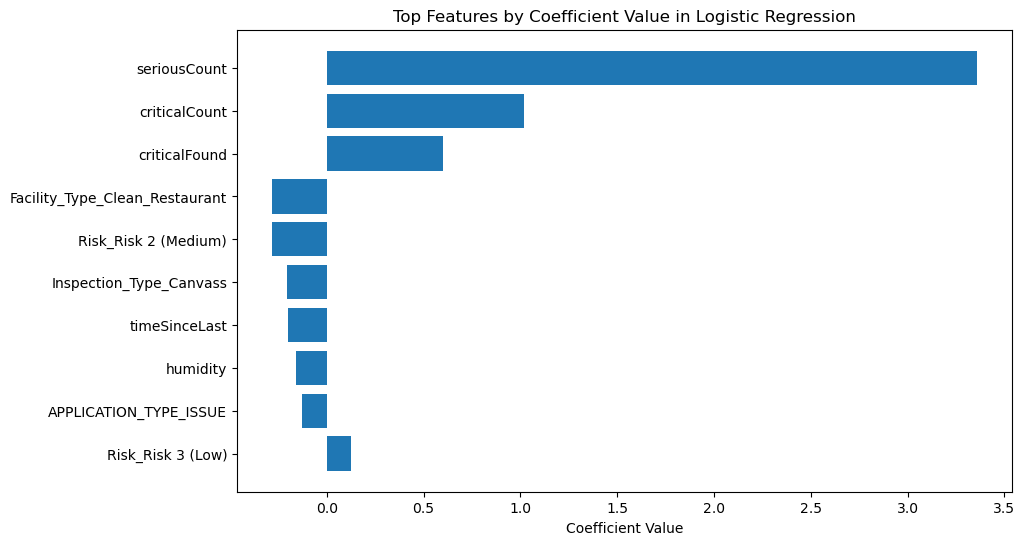

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Extract coefficients from the best logistic regression model
logreg_coefficients = best_lr.coef_[0]  
features = X.columns  

# Create a DataFrame for easier plotting
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': logreg_coefficients})

# Sort by absolute coefficient values for a clearer view of important features
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(10)  # Top 10 features

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Top Features by Coefficient Value in Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [22]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------
y_proba = best_lr.predict_proba(X)

fail_probabilities = y_proba[:, 1]

data_with_probabilities = chicago_inspections_2011_to_2013.copy()
data_with_probabilities['Fail_Probability'] = fail_probabilities

In [23]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
# Sort the data by "Fail_Probability" in descending order to prioritize high-risk cases
data_sorted_by_fail = data_with_probabilities.sort_values(by='Fail_Probability', ascending=False)


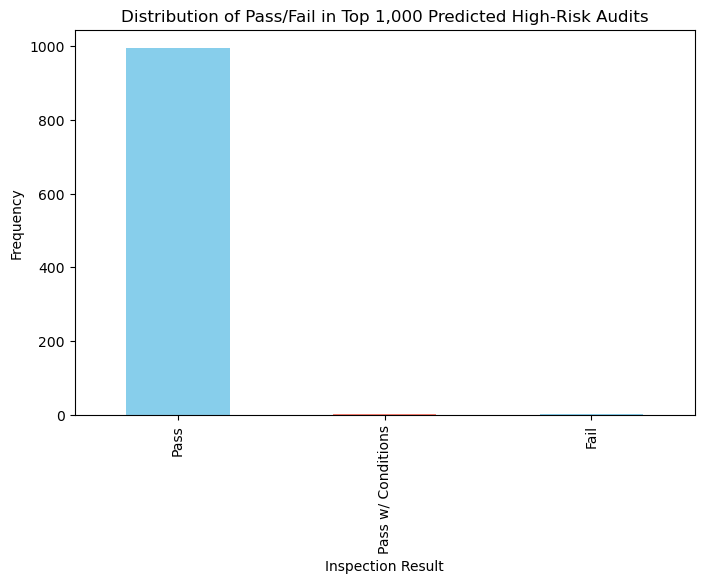

In [24]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
# Select the top 1,000 risky observations based on highest fail probability
top_1000_audits = data_sorted_by_fail.head(1000)

# Plot the distribution of 'Results' in these top 1,000 high-risk cases
plt.figure(figsize=(8, 5))
top_1000_audits['Results'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Pass/Fail in Top 1,000 Predicted High-Risk Audits')
plt.xlabel('Inspection Result')
plt.ylabel('Frequency')
plt.show()

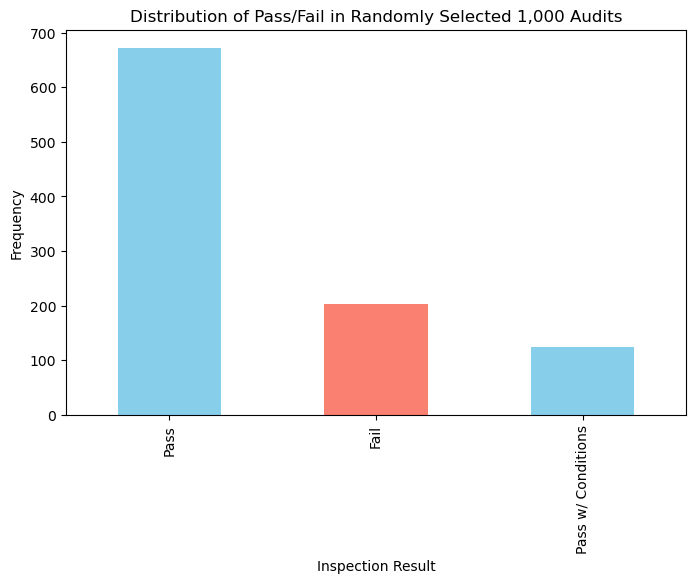

In [25]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------
# -------------------------------------------------------------------------------------------
# Randomly sample 1,000 observations from the full dataset to simulate random audits
random_audits = chicago_inspections_2011_to_2013.sample(n=1000, random_state=42)

# Plot the distribution of 'Results' in this random sample of 1,000 audits
plt.figure(figsize=(8, 5))
random_audits['Results'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Pass/Fail in Randomly Selected 1,000 Audits')
plt.xlabel('Inspection Result')
plt.ylabel('Frequency')
plt.show()

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [32]:
# imports
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# data processing
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",
                                      low_memory=False)
# process features
X_test2014 = chicago_inspections_2014.drop(columns=['Results', 'Facility_Type', 'LICENSE_DESCRIPTION', 'WARD_PRECINCT'])
# Create dummy variables to match training data processing
X_test2014 = pd.get_dummies(X_test2014)

X_test2014 = X_test2014.reindex(columns=X.columns, fill_value=0)  

# Added these imputation steps to handle missing data
imputer = SimpleImputer(strategy='mean')
X_test2014 = pd.DataFrame(imputer.fit_transform(X_test2014), columns=X.columns)  # Convert back to DataFrame

# process target 
y_test2014 = chicago_inspections_2014['Results']


In [33]:
# predict and compare 
# -----------
y_test2014_pred = best_lr.predict(X_test2014)  # Assuming `best_lr` is your favorite/trained model


In [34]:
# Evaluate the model on the 2014 test data
accuracy = accuracy_score(y_test2014, y_test2014_pred)
precision = precision_score(y_test2014, y_test2014_pred, average='weighted')
recall = recall_score(y_test2014, y_test2014_pred, average='weighted')
f1 = f1_score(y_test2014, y_test2014_pred, average='weighted')

# Display evaluation results
print("Model Performance on 2014 Inspection Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model Performance on 2014 Inspection Data:
Accuracy: 0.8998
Precision: 0.9056
Recall: 0.8998
F1 Score: 0.8944


## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


In social sciences and public policy, relying solely on accuracy can obscure important details. Imbalanced datasets often lead to small but critical groups, such as high-risk individuals, being overlooked. Metrics like recall are crucial for detecting these groups, while combining recall with precision highlights the varying consequences of different types of errors, particularly when some errors have more significant repercussions. The F1-score, which balances precision and recall, further aids in assessing performance, and analyzing these metrics across groups can help uncover biases. Employing a diverse set of metrics ensures that models are not only accurate but also fair, ethical, and effective in addressing complex, high-stakes issues.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

If businesses begin altering their behavior to avoid being flagged by the algorithm, policymakers can take steps to maintain fairness and effectiveness. Regularly updating the algorithm ensures it stays responsive to emerging patterns. Incorporating a diverse set of features, introducing random audits, and monitoring for attempts to "game" the system are strategies that help preserve the integrity of the process. By remaining adaptable and proactive, policymakers can ensure that audits remain effective and achieve their intended goals, even when establishments attempt to circumvent the system.